# 최적화 (Optimize)
- 모델이 예측한 결과와 실제 값의 차이를 줄이기 위해서 모델을 수정해야 하는 작업을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

## 최적화 문제
- 손실함수 f(w) 의 값을 최소화(또는 최대화) 하는 변수 w(파라미터)를 찾는 것.
$$
w_{i} = \arg \min_w f(w) 
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'malgun gothic' #Apple gothic
mpl.rcParams['axes.unicode_minus'] = False
# C:\Users\<<사용자계정명>>\anaconda3\envs\ml\Lib\site-packages\matplotlib\mpl-data\matplotlibrc matplotlib 환경설정파일 에서 변경가능.

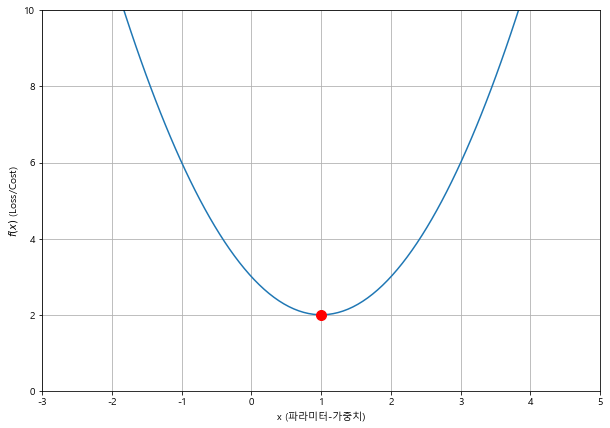

In [9]:
def loss_func(x): #x=>파라미터
    return (x-1)**2 + 2 

plt.figure(figsize=(10,7))
xx = np.linspace(-3,4, 100)
# xx.shape, f1(xx).shape
plt.plot(xx, loss_func(xx))
plt.plot(1,2, 'ro', markersize=10)
plt.ylim(0,10)
plt.xlim(-3,5)
plt.xlabel('x (파라미터-가중치)')
plt.ylabel('$f(x)$ (Loss/Cost)')
plt.grid(True)
plt.show()

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 오차를 정의하는 함수
- 이 함수를 최소화 하는 값을 찾는 것이 최적화의 목적

## 최적화 문제를 해결하는 방법
- 최소값을 찾는 함수(공식)을 찾는다.
    - 공식을 찾을 수 없는 경우가 있다.
    - feature와 sample 수가 많아 질 수록 계산량이 급증한다.
- 경사하강법 (Gradient Descent)    
    - 값을 조금씩 조금씩 조정해나가면서 최소값을 찾는다.

## 경사하강법 (Gradient Descent)
- 다양한 종류의 문제에서 최적의 해법을 찾을 수 있는 **일반적인 최적화 알고리즘**
- 비용함수를 최소화하는 파라미터를 찾기위해 반복해서 조정해 나간다. 
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 gradient(경사,기울기)를 계산한다.
    - gradient가 감소하는 방향으로 벡터 $W$를 조정한다.
    - gradient가 0이 될때 까지 반복한다.

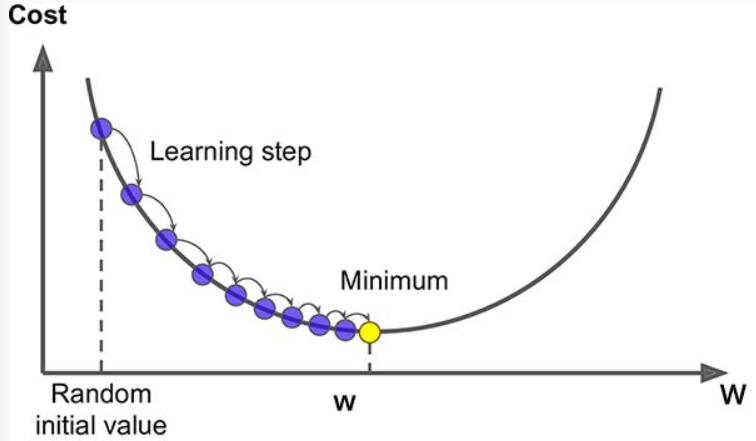

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다.
    - 학습률을 너무 작게 잡으면 최소값에 수렴하기 위해 많은 반복을 진행해야해 시간이 오래걸린다.
    - 학습률을 너무 크게 잡으면 왔다 갔다 하다가 오히려 더 큰 값으로 발산하여 최소값에 수렴하지 못하게 된다.

In [10]:
def f(x):
    return (x-1)**2 + 2 

In [11]:
# 함수 f의 도함수
def fd(x):
    return 2*(x-1)

1차시도: w=0.00, 기울기 = -2.00
2차시도: w=2.20, 기울기 = 2.40
3차시도: w=-0.44, 기울기 = -2.88
4차시도: w=2.73, 기울기 = 3.46
5차시도: w=-1.07, 기울기 = -4.15
6차시도: w=3.49, 기울기 = 4.98
7차시도: w=-1.99, 기울기 = -5.97


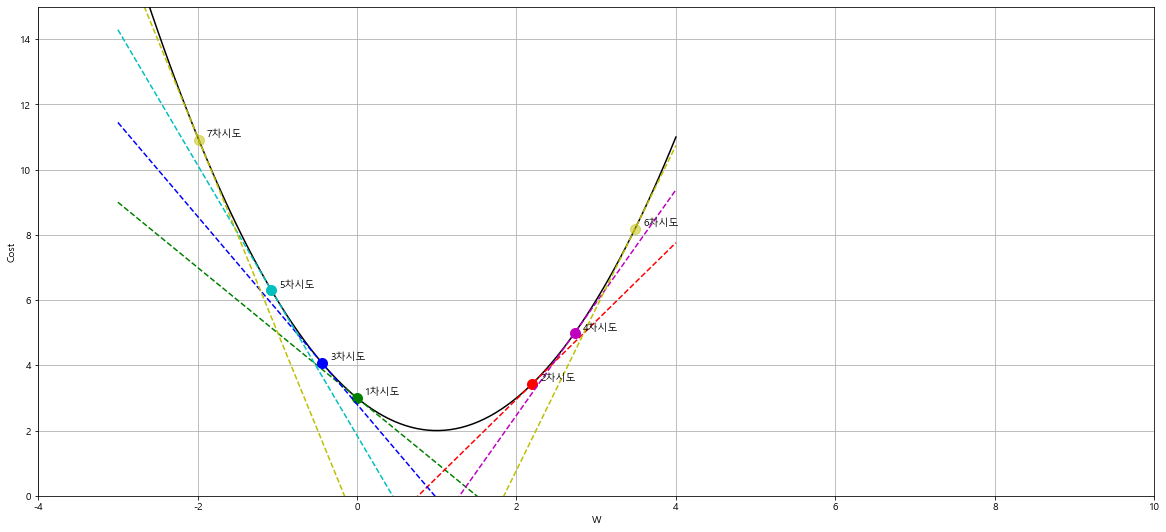

In [25]:
X = np.linspace(-3,4, 100)

plt.figure(figsize=(20,9))
plt.plot(X, f(X), 'k-')

# learning_rate = 0.4 #: 5차
# learning_rate = 0.01 #: 학습률이 너무 작을 경우 최적의 파라미터를 찾는데 너무 오래 걸린다.
learning_rate = 1.1 #: 학습률이 너무 큰 값일 경우에는 발산해서 최적의 파라미터를 찾지 못할 수 있다.

# w: 조정할 가중치
w = 0
plt.plot(w, f(w), 'go', markersize=10)
plt.text(w+0.1, f(w)+0.1, '1차시도')
plt.plot(X, fd(w)*(X) + f(w), 'g--')
print('1차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'ro', markersize=10)
plt.text(w+0.1, f(w)+0.1, '2차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'r--')
print('2차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'bo', markersize=10)
plt.text(w+0.1, f(w)+0.1, '3차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'b--')
print('3차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))


w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'mo', markersize=10)
plt.text(w+0.1, f(w)+0.1, '4차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'm--')
print('4차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))


w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'co', markersize=10)
plt.text(w+0.1, f(w)+0.1, '5차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'c--')
print('5차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'yo', markersize=10, alpha=0.5)
plt.text(w+0.1, f(w)+0.1, '6차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'y--')
print('6차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'yo', markersize=10, alpha=0.5)
plt.text(w+0.1, f(w)+0.1, '7차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'y--')
print('7차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))









plt.ylim(0,15)
plt.xlim(-4,10)
plt.xlabel('W')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [46]:
w = np.random.randint(-5,5) #w: 파라미터(가중치-weight)
learning_rate = 0.4
cnt = 0 #반복횟수
w_list = [w]
while True:
    if fd(w) == 0: #변화율(기울기)이 0이면
        break
    if cnt == 200: #최대 100번만 반복
        break
    w = w - learning_rate*fd(w)
    w_list.append(w)
    cnt += 1

In [47]:
# 0.1
print(cnt)
w_list

25


[-5,
 -0.1999999999999993,
 0.7600000000000002,
 0.9520000000000001,
 0.9904000000000001,
 0.99808,
 0.999616,
 0.9999232,
 0.99998464,
 0.999996928,
 0.9999993856,
 0.99999987712,
 0.999999975424,
 0.9999999950848,
 0.99999999901696,
 0.999999999803392,
 0.9999999999606785,
 0.9999999999921357,
 0.9999999999984271,
 0.9999999999996855,
 0.999999999999937,
 0.9999999999999875,
 0.9999999999999974,
 0.9999999999999994,
 0.9999999999999999,
 1.0]